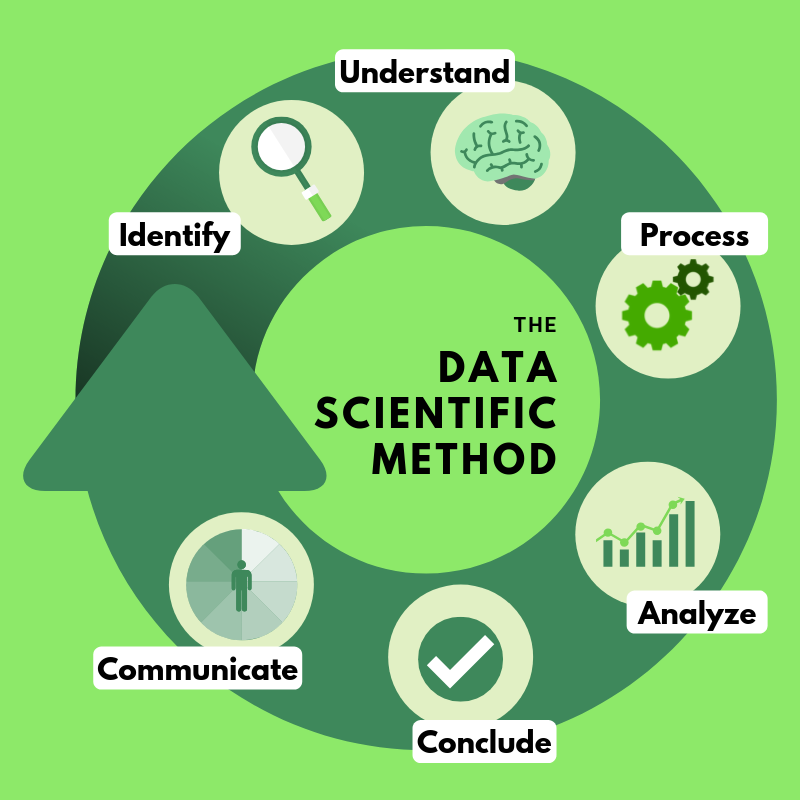

1.  [INRODUCTION](#section-one-one)
2. [OBJECTIVE](#section-one-two)
3. [DATASET](#section-one-three)
4. [APPROACH](#section-one-four)
5. [Basic exploratory data analysis](#section-two)
    - [5.1 Load library](#load)
    - [5.2 Read Dataset](#read-dataset)
6. [Characterstics of People](#section-three)
     -  [Age Distribution](#age)
     - [Participation based on Gender](#gender)
     - [Top 25 countries](#country)
     - [Education](#education)
7. [Preferences of Data Scientist](#section-four)
     - [7.1 Favourite Media Sources](#media)
     - [7.2 MOOC Courses](#mooc)
     - [7.3 Plateform types for Projects](#plt)
8. [Common Practices of Data Scientist](#section-five)
     - [8.1 Coding Experience](#code)
     - [8.2 Programming Languages](#lan)
     - [8.3 Popular IDE and Visualization](#ide)
     - [8.4 Hosted Notebooks](#hosted)
9. [Data scientist on there Regualr basis](#section-six)
     - [Hardware usuage and Ml experience](#ml-ex)
     
* [Conclusion](#section-three)

<a id="section-one-one"></a>
# 1.Introduction:
**DO YOU FEEL DATA SCIENCE IS GROWING NOWDAYS**

> In the past few years we can feel there is too much focus on data in every industry. Everything what we do ,what we talk in our surrounding is becoming Data.Data is integral part of every decision making process and it helps to resolve complex problems. When it comes to analyze and use historical data and  when some community makes effort to understand how to deal with data, this field  becomes more interesting.
> Kaggle makes this task easy to understand how data can be used to tell story.

This is fourth year when Kaggle conducting same experiment which is truely comprenhensive of the state of Data science and Machine learning.

In this notebook we are going to see what Data scientist are doing in this field all over the world.

<a id="section-one-two"></a>
# 2.Objective:
Objective of this challange is need to tell a tell a data story data science community represented in this survey, through a combination of both narrative and visulaization techniques.This is basically a Analytics type of challange and we have to focus on more about a  “story” which could be defined any number of ways. In this challenge we going to analyze some best practices and preference of data scientist whloe over the world also we encounter them based on characterstics in deep and some good combination of plots .In this notebook we  tries to see the title of notebook is valid or noth. At the end of this notebook we comes up some good recommendation from this survey which is really helpful to beginners like me.


<a id="section-one-three"></a>
# 3.Dataset:
To check my assumption that data sciemce is growing in last two years, I am using 2019 and 2020 years dataset in this notebook. We know it's fourth time Kaggle is conducting this survey,I try to focus on the latest information, things which were in trend and the changes happened in the last two years in the data science.In this coming story of these two  years,I will compare and come up with some interesting insights and facts.

The both dataset yu can found here.

2020 Kaggle ML & DS Survey: https://www.kaggle.com/c/kaggle-survey-2020/data

2019 Kaggle ML & DS Survey: https://www.kaggle.com/c/kaggle-survey-2019/data


<a id="section-one-four"></a>
# 4.Approach:

1. I try to keep myself on one library known as "PLOTLY" for visualization and this is famous for it's intersting and amazing plots 
2. In this notebook,I try to divide whole survey analysis in different subsets like Basic analysis contains Age group, country, degree,etc.h
3. Once we know all the information regarding characterstics of Data scientist we try to analyze what their preferences on regular basis in two years.
4. We will get to know "Is really Data science growing" at the end of this notebook 
5. I will update this notbook as we will move ahead in this competition so please stay tuned!.



<a id ="section-two" ></a>
# Basic exploratory data analysis:
In this section of notebook we are loading some imporatant libraries to handle data and visualization. 

<a id="load"></a>
# 5.1 Load library:

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import operator

<a id="read"></a>
# 5.2 Load and Read Dataset:

In [ ]:
df_20=pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
df_20.drop(df_20.index[0],inplace=True)
df_20.head(2)
df_19=pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv",encoding='latin-1')
df_19.drop(df_19.index[0],inplace=True)

In [ ]:
df_20.head()

In [ ]:
df_19.head()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(20.0,10.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
     
plot_wordcloud(df_20["Q5"].dropna(), title="Current Role of Participating people in 2020")

Yes we can see Software and Research people are in trend till now but in parallel we can observe Machine learning in our word cloud is also in trend.We will analyze further what Data scientist common practices and how much our title of notebook hold in this compitition.

<a id="age"></a>
# Age Distribution:
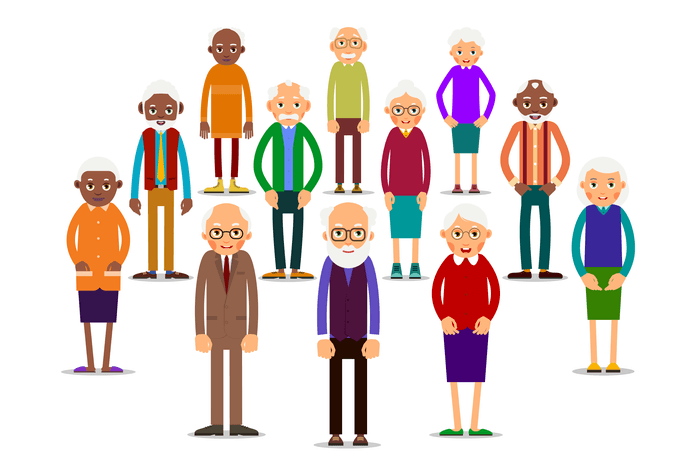

It's become imporatnt to know from which age group of people are participating in both of years and how there disribution changes.

In [ ]:
Age_19 = df_19['Q1'].value_counts().reset_index()
Age_20 = df_20['Q1'].value_counts().reset_index()

specs =[[{'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs)
fig.add_trace(go.Pie(labels=Age_19['index'],values=Age_19['Q1'],name="2019",hole=0.4,domain={'x': [0,0.46]}), 1, 1)
fig.add_trace(go.Pie(labels=Age_20['index'],values=Age_20['Q1'],name="2020",hole=0.4,domain={'x': [0,0.46]}),1,2)
#fig.add_trace(go.Pie(labels=Age_20['index'],values=Age_20['Q1'],name="2020",hole=0.4,domain={'x': [0,0.46]}),1,3)


fig.update_traces(hole=.6, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Age Gropu across the years",
   annotations=[dict(text='2019', x=0.18, y=.550, font_size=20, showarrow=False),
                dict(text='2020', x=0.80, y=0.55, font_size=20, showarrow=False),
                #dict(text='2020', x=0.89, y=0.55, font_size=20, showarrow=False)
               ])

fig.show()

In [ ]:
Age=Age_19.merge(Age_20,on='index')
Age.rename(columns={'Q1_x': '2019'})
Age

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=Age['index'].values,
                y=Age['Q1_x'].values,
                name='2019',
                marker_color='#009688'
                ))
fig.add_trace(go.Bar(x=Age['index'].values,
                y=Age['Q1_y'].values,
                name='2020',
                marker_color='#83d0c9'
                ))
fig.update_layout(
    title='Age_Distribution',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Age_Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1 
)
fig.show()

> Young people participation is increasing as the field of Data Science is growing day by day that is pretty amazing things for us,but the participation of senior class is matter in almost all the works.
1. Now if we see the trand in both years there are maximum number of peoples coming from age group 25-29,but trend in 2020 contains more participation from young age group of class 18-21(Countries like india have college going students of this age group) while keeping in mind of seniority level, there was less participation in 2020 compared to 2019.
2. In 2020 we can see as the participation of 25-29 years age group decreased but 22-24 and 18-21 was increased compare to year 2019.

As the time will change ,I think there will be more young people participation.
Overall 20-35 peoples are more active in participation.

<a id="gender"></a>
# Participation based on Gender:

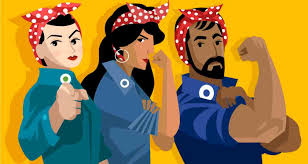

In [ ]:
Gender_19 = df_19['Q2'].value_counts().reset_index()
Gender_20 = df_20['Q2'].value_counts().reset_index()

specs =[[{'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs)

fig.add_trace(go.Pie(labels=Gender_19['index'],values=Gender_19['Q2'],name="2019",hole=0.4,domain={'x': [0,0.46]}),1,1)
fig.add_trace(go.Pie(labels=Gender_20['index'],values=Gender_20['Q2'],name="2020",hole=0.4,domain={'x': [0,0.46]}),1,2)


fig.update_traces(hole=.6, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Gender across the years",
   annotations=[
                dict(text='2019', x=0.19, y=0.55, font_size=20, showarrow=False),
                dict(text='2020', x=0.80, y=0.55, font_size=20, showarrow=False)])

fig.show()

> By looking this above visualization it's become clear that Data science field based on gender equality is highly imbalanced in nature.Yes it is true that contribution of female side increases in 2020 compared to 2019 but not upto the mark.
We have to encourage the female group to take participiation in the data science and share their knowledge.

In [ ]:
df_20['Q2'].replace({'Man':'Male','Woman':'Female'},inplace=True)
df_gender_count_20 = pd.DataFrame({'Gender':df_20["Q2"].value_counts().index, 
                               'Count':df_20["Q2"].value_counts().values}).sort_values("Gender",ascending=False)

df_gender_count_19 = pd.DataFrame({'Gender':df_19["Q2"].value_counts().index, 
                               'Count':df_19["Q2"].value_counts().values}).sort_values("Gender",ascending=False)
fig = make_subplots(rows=2, cols=1, specs=[[{'type':'xy'}],
                                          [{'type':'xy'}]], subplot_titles=('Gender_based_Participation_20','Gender_based_Participation_19'))
        
fig.add_trace(
    go.Bar(x=df_gender_count_20["Count"],
                     y=df_gender_count_20['Gender'],
                     marker_color='LightSkyBlue',
                     marker_line_color='#536872',
                     marker_line_width=1.5, 
                     opacity=0.6,
                     orientation='h'),row=1, col=1)
fig.add_trace(
    go.Bar(x=df_gender_count_19["Count"],y=df_gender_count_19["Gender"],
            marker_color='red',
            marker_line_color='#536878',
            marker_line_width=1.5, 
            opacity=0.6,
            orientation='h'),row=2, col=1)
fig.update_layout(
    title_text="Gender",
    height=600, width=600, showlegend=False)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.show()

> It's true that female contribution is incresing as Data science field is growing and i hope we can see more contribution in coming years.
It's our responsibility also to make this data balanced by doing some campaign where we are totally focus to female group, we have to motivated our women to come up 
! Common girls

<a id="country"></a>
# Top 25 Countries:

let's examine which part of world is most active to producing Data scientist or let's say from which part of people making there contribution in this field.


In [ ]:
country_wise_distribution_19=df_19['Q3'].value_counts()
fig = px.choropleth(country_wise_distribution_19.values, locations=country_wise_distribution_19.index,
                    locationmode='country names',
                    color=country_wise_distribution_19.values,
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_layout(title="Country_wise Distribution of Data Scientists-2019")
fig.show()

country_wise_distribution_20=df_20['Q3'].value_counts()
fig = px.choropleth(country_wise_distribution_20.values, locations=country_wise_distribution_20.index,
                    locationmode='country names',
                    color=country_wise_distribution_20.values,
                    color_continuous_scale=px.colors.sequential.dense)
fig.update_layout(title="Country_wise Distribution of Data Scientists-2020")
fig.show()

1. Most of the peoples are coming from INDIA and USA but compared to 2019 USA somehow loosing it's grab to produce data scientist where india is one of the famous county which producing more and more data scientist.
2. There was very less participation from African Sub-continent and some other countries which has very low participation are grouped others in both years.
3. Let's see top 25 countries which were mostly active and tried to capture their trend in two years.

In [ ]:
count_20 = df_20['Q3'].value_counts().head(25).reset_index().rename(columns={'index': 'Country','Q3':'2020'})
count_19 = df_19['Q3'].value_counts().head(25).reset_index().rename(columns={'index': 'Country','Q3':'2019'})
Top_25_Countries=count_19.merge(count_20,on='Country')
Top_25_Countries

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=Top_25_Countries['Country'].values,
                y=Top_25_Countries['2019'].values,
                name='2019',
                marker_color='#854442'
                ))
fig.add_trace(go.Bar(x=Top_25_Countries['Country'].values,
                y=Top_25_Countries['2020'].values,
                name='2020',
                marker_color='#be9b7b'
                ))
fig.update_layout(height=900,
    title='Country_Yearly_Contribution',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Participation_Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=.5,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.2 
)
fig.show()

1. 
2. Where as in 2020 the number of countries increased which have very low contribution means Other participation increased in 2020
3. Countries like Japan, Russia tried to maintain there contribution
4. Nigeria, Indonesia are the countries from  where contribution is increasing.

<a id="age-country"></a>
# Data Scientist Age in INDIA AND USA:

In [ ]:
gkk = df_20.groupby(['Q3', 'Q5'])
kkg = df_19.groupby(['Q3', 'Q5'])
gkk.get_group(('India','Data Scientist'))
gkk_20_india=gkk.get_group(('India','Data Scientist'))
gkk_20_usa=gkk.get_group(('United States of America','Data Scientist'))

kkg.get_group(('India','Data Scientist'))
kkg_19_india=kkg.get_group(('India','Data Scientist'))
kkg_19_usa=kkg.get_group(('United States of America','Data Scientist'))

fig = make_subplots(rows=2, cols=2, specs=[[{'type':'xy'}, {'type':'xy'}],
                                          [{'type':'xy'}, {'type':'xy'}]], subplot_titles=('India_2020', 'India_2019','USA_2020','USA_2019'))

fig.add_trace(
    go.Bar(x=gkk_20_india['Q1'].dropna().value_counts().index, y=gkk_20_india['Q1'].dropna().value_counts().values, name="INDIA_2020"),
    row=1, col=1)

fig.add_trace(
    go.Bar(x=kkg_19_india["Q1"].dropna().value_counts().index, y=kkg_19_india["Q1"].dropna().value_counts().values, name="India_2019"),
    row=1, col=2)

fig.add_trace(
    go.Bar(x=gkk_20_usa['Q1'].dropna().value_counts().index, y=gkk_20_usa['Q1'].dropna().value_counts().values, name="USA_2020"),
    row=2, col=1)

fig.add_trace(
    go.Bar(x=kkg_19_usa["Q1"].dropna().value_counts().index, y=kkg_19_usa["Q1"].dropna().value_counts().values, name="USA_2019"),
    row=2, col=2)
fig.update_layout(
    title_text="Data Scientist Age",
    height=600, width=990, showlegend=False)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6) 
                 
fig.show()

1.  Young talent is coming from India in both of years compared to USA as mostly data scientist age in USA is 25-34 whereas from India we can see the peoples from 18-30 years are participating. 

<a id="degree"></a>
# Education:
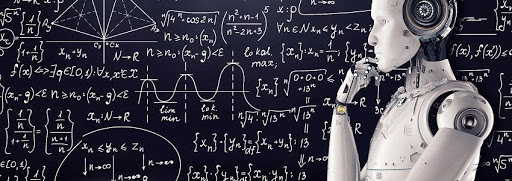


Many peoples who are the beginners like me have a question to become data scientist what we need to study.So in this section we tries to see what the education background of data scientist in 2019 and 2020

In [ ]:
degree_19=df_19['Q4'].value_counts().dropna().index
degree_20=df_20['Q4'].value_counts().dropna().index

wordcloud2 = plot_wordcloud(degree_20, title="Education Qualification in 2020")
wordcloud3 =plot_wordcloud(degree_19, title="Education Qualification in 2019")

In [ ]:

df_19['Q4'].replace({'Masterâs degree':'Master’s degree','Bachelorâs degree':'Bachelor’s degree'},inplace=True)
degree_20 = df_20['Q4'].value_counts().reset_index().rename(columns={'index': 'Education','Q4':'2020'})
degree_19 = df_19['Q4'].value_counts().reset_index().rename(columns={'index': 'Education','Q4':'2019'})
Education=degree_19.merge(degree_20,on='Education')
Education

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=Education['Education'].values,
                y=Education['2019'].values,
                name='2019',
                marker_color='#3385c6'
                ))
fig.add_trace(go.Bar(x=Education['Education'].values,
                y=Education['2020'].values,
                name='2020',
                marker_color='#7f8e9e'
                ))
fig.update_layout(
    title='Education_Yearly_Contribution',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Degree_Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=.5,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.2
)
fig.show()

1. Master's people contibution was maximum in both the years but 2020 not good for master's people as this number is decreased compared to 2019.
2. Bachelor's people were mostly young people and their contribution is really appreciated in 2020 as compared to 2019.
3. We can easily observe professional degree people were increasing in data sciene and the mostly doctroal degree loosing their interest in 2020 as compared to 2019.

<a id="section-four"></a>
# 7. Preferencies of Data Scientist:

In this section of notebook I try to analyze what common preferences data scientist have in last two years which can be very helpful for those peoples who are going to start amazing journey in this field.There are lot of media resources we know which are quite popular so let's  compare data and observe which media resource play a major role in field of Data science.when we talk about media resources we have another thing in our mind from where we can learn data science and for this what are MOOC courses avilabLe and which mooc courses are in trend, also we are going to see which plateform data scientist are choosing to show their work.
so Let's begin!

<a id="media"></a>
# 7.1 Favourite media Sources:

In [ ]:
media_20={} # dictionary is seems to be very helpful for analyzing where we have more than one choice for selection.
for i in range(10):
    value=df_20['Q39_Part_'+str(i+1)].value_counts().values[0]
    text=df_20['Q39_Part_'+str(i+1)].value_counts().index[0]
    media_20[text]=value
media_20=dict(sorted(media_20.items(), key=operator.itemgetter(1)))
media_19={}
for i in range(10):
    value=df_19['Q12_Part_'+str(i+1)].value_counts().values[0]
    text=df_19['Q12_Part_'+str(i+1)].value_counts().index[0]
    media_19[text]=value
media_19=dict(sorted(media_19.items(),key=operator.itemgetter(1)))

x_2020=list(media_20.keys())
y_2020=list(media_20.values())
x_2019=list(media_19.keys())
y_2019=list(media_19.values())

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"},{"type": "domain"}]],
)

fig.add_trace(go.Bar(x=x_2020, y=y_2020),
              row=1, col=1)
fig.add_trace(go.Pie(labels=x_2020,values=y_2020),
              row=1, col=2)

fig.update_layout(height=800, showlegend=False,title="Media sources in 2020")
fig.show()

1. Kaggle is a great source of learning which we can see from 2020 years of data, From the all over world there are great data scientist who share their work in this plateform and from where we can easily learn.
2. Ohh It's interesting to see youtube gaining popularity in Data science (covid may be one reason) as people never stops learning and through youtube we easily can share and spread knowledge across the world.
3. Blogs play an important role to understand many aspects of DATA SCIENCE.
4. Podcasts is pretty new entry and we use to enjoy chai time episods quite well and also we come to across how someone won the compitition and what kind of approached they followed.

In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"},{"type": "domain"}]],
)

fig.add_trace(go.Bar(x=x_2019, y=y_2019),
              row=1, col=1)
fig.add_trace(go.Pie(labels=x_2019,values=y_2019),
              row=1, col=2)

fig.update_layout(height=800, showlegend=False,title="Media sources in 2019")
fig.show()

1. In 2019 also we can see Kaggle attracts a lot of people due to its amazing kernels and resources.
2. Youtube is not much popular in last year where Blogs play an important role previously also.
3. Hacker news was also a favourite media source in 2019.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])
wordcloud1 = WordCloud( background_color='White',
                        width=600,
                        height=500).generate_from_frequencies(media_20)
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Media_Sources-2020',fontsize=20);

wordcloud2 = WordCloud( background_color='White',
                        width=600,
                        height=500).generate_from_frequencies(media_19)
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Media_Sources-2019',fontsize=20);



In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"},{"type": "domain"}]],subplot_titles=('Media_2020', 'Media_2019')

)
fig.add_trace(go.Pie(labels=x_2020,values=y_2020),
              row=1, col=1)
fig.add_trace(go.Pie(labels=x_2019,values=y_2019),
              row=1, col=2)


fig.update_layout(height=800,showlegend=False)
fig.show()

1. Kaggle maintained to attract people for learning Data science from its kernels in both years.
2. People are more interesting to watch videos from youtube and learn compare to read some good blogs in 2020.
3. Podcasts are pretty new and amazing resource to know about how others are walking in this journey
4. Slack communities are growing in 2020 and we hope we will have great Courses Forums in future. 

<a id="mooc"></a>
# 7.2 MOOC COURSES:
when we are beginner in data science, we always used to search some good sources of materials from which we can learn fasts.So in this subsection of this notebook we going to see which mooc courses are trending in data science.

In [ ]:
df_20['Q37_Part_3'].replace({'Kaggle Learn Courses':'Kaggle'},inplace=True)
df_20['Q37_Part_10'].replace({'University Courses (resulting in a university degree)':'University Courses'},inplace=True)
df_20['Q37_Part_9'].replace({'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)':'Cloud-certification'},inplace=True)
df_19['Q13_Part_6'].replace({'Kaggle Courses (i.e. Kaggle Learn)':'Kaggle'},inplace=True)
df_19['Q13_Part_10'].replace({'University Courses (resulting in a university degree)':'University Courses'},inplace=True)


mooc_20={} 
for i in range(10):
    value=df_20['Q37_Part_'+str(i+1)].value_counts().values[0]
    text=df_20['Q37_Part_'+str(i+1)].value_counts().index[0]
    mooc_20[text]=value
mooc_20=dict(sorted(mooc_20.items(), key=operator.itemgetter(1)))

mooc_19={} 
for i in range(10):
    value=df_19['Q13_Part_'+str(i+1)].value_counts().values[0]
    text=df_19['Q13_Part_'+str(i+1)].value_counts().index[0]
    mooc_19[text]=value
mooc_19=dict(sorted(mooc_19.items(), key=operator.itemgetter(1)))



x_2020=list(mooc_20.keys())
y_2020=list(mooc_20.values())
x_2019=list(mooc_19.keys())
y_2019=list(mooc_19.values())

fig = go.Figure()
fig.add_trace(go.Bar(x=x_2020,
                y=y_2020,
                name='2020',
                marker_color='#3d2352'
                ))
fig.add_trace(go.Bar(x=x_2019,
                y=y_2019,
                name='2019',
                marker_color='#8874a3'
                ))

fig.update_layout(height=500, 
    title='MOOC Courses ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Course_Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
#fig.update_layout(height=900, showlegend=False)
fig.show()


1. Coursera is one of best plateform for learning data science in deep way but in 2020 peoples focus on cloud-certification which was missing in 2019
2. Udemy attracts people due to sales and looks like maintained its position almost same in both of the years and same for kaggle
3. Datacamp,Udacity,edx were quite famous in 2019 compared to 2020 whereas Linkedin is growing in 2019.

<a id="plateform"></a>
# 7.3 Plateforms types for Data science Projects:
once we learn something we are intersting to share with others people and for this purpose which comes to be famous plateform for data science projects ,we going to see in this section

<a id="section-five"></a>
# 8.Common Practices of Data Scientist:
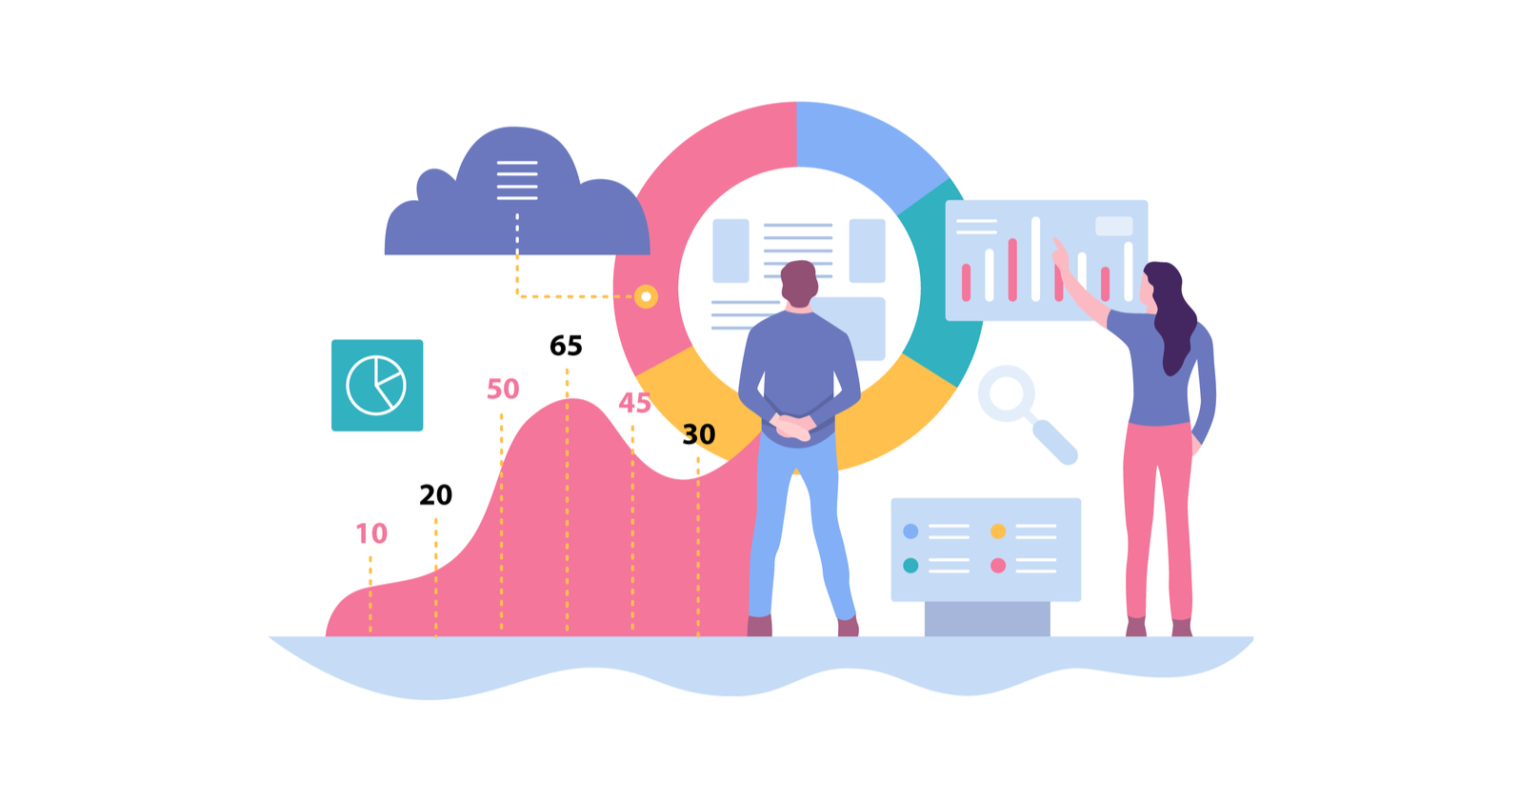
In this section we going to see what are the common practices Data scientist followed in last two years .Which programming language,visualization libraries, IDE peoples followed on the regular basis of their work.

<a id="code"></a>
# 8.1.Coding experience:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_20['Q6'].value_counts().index,
                y=df_20['Q6'].value_counts().values,
                name='2020',
                marker_color='#8d5524'
                ))
fig.add_trace(go.Bar(x=df_19['Q15'].value_counts().index,
                y=df_19['Q15'].value_counts().values,
                name='2019',
                marker_color='#f1c27d'
                ))
fig.update_layout(
    title='Coding_Experience_Distribution',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Coding_Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
fig.show()

1. Numbers of peoples were increased of having 3-5 years of experience in 2020 and peoples who have less than one year of experience are decreased that is interesting because having knowledge about Data is not sufficeint for us to become data scientist , we also should know how to code also.
2. Maximum number of peoples have 2-5 years of experience whereas seniority level is increasing in 2020 compared to 2019

<a id="Programming language"></a>
# 8.2 Programming languages:

In [ ]:
lan_19,lan_20={},{}
for i in range(10):
    value_19=df_19['Q18_Part_'+str(i+1)].value_counts().values[0]
    text_19=df_19['Q18_Part_'+str(i+1)].value_counts().index[0]
    lan_19[text_19]=value_19
    value_20=df_20['Q7_Part_'+str(i+1)].value_counts().values[0]
    text_20=df_20['Q7_Part_'+str(i+1)].value_counts().index[0]
    lan_20[text_20]=value_20
lan_19=dict(sorted(lan_19.items(), key=operator.itemgetter(1)))
lan_20=dict(sorted(lan_20.items(), key=operator.itemgetter(1)))

x_lan_2020=list(lan_20.keys())
y_lan_2020=list(lan_20.values())
x_lan_2019=list(lan_19.keys())
y_lan_2019=list(lan_19.values())

fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "xy"},{"type": "xy"}],[ {"type": "scatter","colspan":2},None],
          [{"type": "domain"},{"type": "domain"}]],
    subplot_titles=('Programming_Languages-2020','Programming_Languages-2019','Recommendation of Programming_Languages'))

fig.add_trace(go.Bar(y=x_lan_2020, x=y_lan_2020,orientation='h'),
              row=1, col=1)
fig.add_trace(go.Bar(y=x_lan_2019, x=y_lan_2019,orientation='h'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=df_20['Q8'].dropna().value_counts().index,y=df_20['Q8'].value_counts().values),row=2,col=1)
fig.add_trace(go.Scatter(x=df_19['Q19'].dropna().value_counts().index,y=df_19['Q19'].value_counts().values),row=2,col=1)

fig.add_trace(go.Pie(labels=df_20['Q8'].dropna().value_counts().index,values=df_20['Q8'].dropna().value_counts().values),
              row=3, col=1)
fig.add_trace(go.Pie(labels=df_19['Q19'].dropna().value_counts().index,values=df_19['Q19'].dropna().value_counts().values),
              row=3, col=2)

fig.update_layout(height=900, showlegend=False)
fig.show()

1. In Both of the years Python won the race as well as it is highly recommended from data scientist to learn before start journey of data science.
2. Data science is all about data so we should know how to handle data and for that knowing about database is necessary and sql is second winner in this race but not that much recommended compare to R. We know beauty of R so python and R are highly recommended followed by sql to start Data sciecnce
3. Still fights are going between R and Python but in 2020 peoples are more using python.
4. Yes it is true that C++ is low latency language and fast compared to python but knowing python is almost good for data scientist.
5. Julia is new entry in field of data science and hope it will come in competition soon with python because peoples are telling julia is fast in statistical calculation compared to python

<a id="ide"></a>
# 8.3 Popular IDE and visualization library:

In [ ]:
ide_20,ide_19=[],[]
ide_val_20,ide_val_19=[],[]
for i in range(10):
    value_20=df_20['Q9_Part_'+str(i+1)].value_counts().values[0]
    text_20=df_20['Q9_Part_'+str(i+1)].value_counts().index[0]
    value_19=df_19['Q16_Part_'+str(i+1)].value_counts().values[0]
    text_19=df_19['Q16_Part_'+str(i+1)].value_counts().index[0]
    ide_20.append(text_20)
    ide_val_20.append(value_20)
    ide_19.append(text_19)
    ide_val_19.append(value_19)
data_ide_tuples_20 = list(zip(ide_20,ide_val_20))
data_ide_tuples_19 = list(zip(ide_19,ide_val_19))


df19=pd.DataFrame(data_ide_tuples_19, columns=['IDE','Count_2019'])
df20=pd.DataFrame(data_ide_tuples_20, columns=['IDE','Count_2020'])
df_ide=df19.merge(df20,on='IDE')
df_ide

In [ ]:
vis_20,vis_19=[],[]
vis_val_20,vis_val_19=[],[]
for i in range(10):
    value_20=df_20['Q14_Part_'+str(i+1)].value_counts().values[0]
    text_20=df_20['Q14_Part_'+str(i+1)].value_counts().index[0]
    value_19=df_19['Q20_Part_'+str(i+1)].value_counts().values[0]
    text_19=df_19['Q20_Part_'+str(i+1)].value_counts().index[0]
    vis_20.append(text_20)
    vis_val_20.append(value_20)
    vis_19.append(text_19)
    vis_val_19.append(value_19)
data_vis_tuples_20 = list(zip(vis_20,vis_val_20))
data_vis_tuples_19 = list(zip(vis_19,vis_val_19))
data_vis_tuples_20,data_vis_tuples_20

df19=pd.DataFrame(data_vis_tuples_19, columns=['VIS','Count_2019'])
df20=pd.DataFrame(data_vis_tuples_20, columns=['VIS','Count_2020'])
df_vis=df19.merge(df20,on='VIS')
df_vis

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scatter"},{"type": "scatter"}]],subplot_titles=('Integrated Development Environments','Visualization Library'))
fig.add_trace(go.Scatter(
    x=df_vis['VIS'].values,
    y=df_vis['Count_2019'].values,
    name = 'Vis_2019'
),row=1,col=2)
fig.add_trace(go.Scatter(
    x=df_vis['VIS'].values,
    y=df_vis['Count_2020'].values,
    name='Vis_2020',
),row=1,col=2)


fig.add_trace(go.Scatter(
    x=df_ide['IDE'].values,
    y=df_ide['Count_2019'].values,
    name = 'Ide_2019'
),row=1,col=1)
fig.add_trace(go.Scatter(
    x=df_ide['IDE'].values,
    y=df_ide['Count_2020'].values,
    name='Ide_2020',
),row=1,col=1)

fig['layout'].update( height=500,width=1000)
py.offline.iplot(fig)


1. As most of peoples are using Python so it's obvious that jupyter won the race in popular ide whereas pycharm is using more in 2020 compared to 2019 and Rstudio loosed its grab in 2020.
2. There are amazing library for visualization known as Plotly(I am using this) but there is less awareness in peoples as in 2020 again Matplotlib won the race
3. There is slight increase in number of peoples who are using matplotlib as well as seaborn in 2020 as compared to 2019.

<a id="(section-six)"></a>
# 9.Data scientist on there Regualr basis:
In this section we tries to see usage of machine learning methods with Hardwares in both of years


In [ ]:
df_19['Q21_Part_4'].replace({'None / I do not know':'None'},inplace=True)
hrd_20,hrd_19=[],[]
hrd_val_20,hrd_val_19=[],[]
for i in range(3):
    value_20=df_20['Q12_Part_'+str(i+1)].value_counts().values[0]
    text_20=df_20['Q12_Part_'+str(i+1)].value_counts().index[0]
    hrd_20.append(text_20)
    hrd_val_20.append(value_20)
for i in range(5):
    value_19=df_19['Q21_Part_'+str(i+1)].value_counts().values[0]
    text_19=df_19['Q21_Part_'+str(i+1)].value_counts().index[0]
    hrd_19.append(text_19)
    hrd_val_19.append(value_19)
    
data_hrd_tuples_20 = list(zip(hrd_20,hrd_val_20))
data_hrd_tuples_19 = list(zip(hrd_19,hrd_val_19))
data_hrd_tuples_20,data_hrd_tuples_19

df19=pd.DataFrame(data_hrd_tuples_19, columns=['HRD','Count_2019'])
df20=pd.DataFrame(data_hrd_tuples_20, columns=['HRD','Count_2020'])
df_hrd=df19.merge(df20,on='HRD')
df_hrd

In [ ]:
df_20['Q15'].replace({'Under 1 year':'< 1 years'},inplace=True)
Tpu_index_20=df_20['Q13'].value_counts().index
Tpu_values_20=df_20['Q13'].value_counts().values

Tpu_index_19=df_19['Q22'].value_counts().index
Tpu_values_19=df_19['Q22'].value_counts().values

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"},{"type": "xy"}],
         
          [ {"type": "scatter","colspan":2},None]],subplot_titles=("TPU_USUAGE","ML_METHODS_EXPEROENCE","Specialized Hardware")
)

fig.add_trace(go.Bar(x=Tpu_index_20,
                y=Tpu_values_20,
                name='2020',
                marker_color='rgb(55, 83, 109)'
                ),row=1, col=1)
fig.add_trace(go.Bar(x=Tpu_index_19,
                y=Tpu_values_20,
                name='2019',
                marker_color='rgb(26, 118, 255)'
                ),row=1, col=1)


fig.add_trace(go.Bar(x=df_20['Q15'].value_counts().index,
                y=df_20['Q15'].value_counts().values,
                name='2020',
                marker_color='#4f5b66'
                ),row=1, col=2)
fig.add_trace(go.Bar(x=df_19['Q23'].value_counts().index,
                y=df_19['Q23'].value_counts().values,
                name='2019',
                marker_color='#65737e'
                ),row=1, col=2)

fig.add_trace(go.Scatter(
    x=df_hrd['HRD'].values,
    y=df_hrd['Count_2019'].values,
    name = 'HRD_2019'
),row=2,col=1)
fig.add_trace(go.Scatter(
    x=df_hrd['HRD'].values,
    y=df_hrd['Count_2020'].values,
    name='HRD_2020',
),row=2,col=1)



fig.update_layout(height=800, showlegend=False,
    title='Experience_Distribution',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
#fig.update_layout(height=900, showlegend=False)
fig.show()

1. As Data science is growing peoples start using TPU but in very less numbers in both of years, still peoples are using CPU for there work 
2. When we are talking about TPU, another term GPU also comes in our mind which are uses by people more compared to TPU.
3. Looks like very young peoples are entering in Machine learning work and having experience of 1-3 years, still we have to progress in this field.
4. There is less number of seniors who used ml methods in 20+ years upto 2020.
 
So yes we have to put more efforts to raise data science in coming time

# **WORK IN PROGRESS**